# Intro Class Concepts Review

ArcPro installs Python on your computer when it is installed and provides a command line interface in ArcPro.  Python can also be accessed using Jupyter Notebooks and IDLE.  

To use the IDLE IDE, right click on an existing Python file and open with IDLE

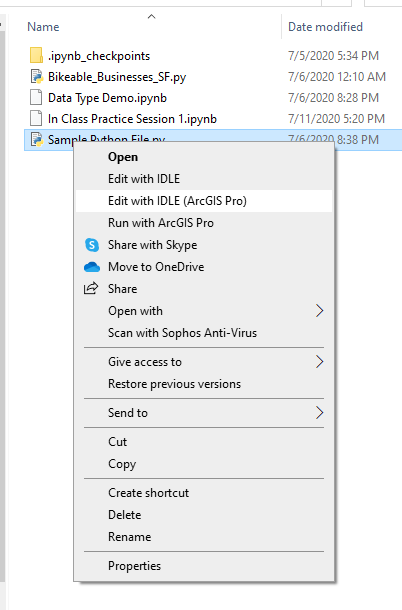


# Syntax

Python is read from top to bottom.  

Python keywords are reserved and will be highlighted a different color.  These are used to tell Python to treat certain sections of code differently.

The # symbol will comment out a line, causing Python to not include any text on that line in the code that is executed.

Indenting is the main syntax requirement for Python.  Conditional statements, loops and the definition of functions require the following code to be indented.

A script should be self documenting with comments explaining what each section of a script is doing.  Variable names should also somewhat relate to the object/data that they are storing, so people reading the code can understand how it is used.

The general order of a script should be.

* Import libraries that will be used

* Set global variables that will be used in the script

* Set environmental variables

* Define any functions that will be used

* Then write the code that will use the variables and functions defined above.


In [ ]:
#Script to loop through a folder of shapefiles and clip them using an input buffer
import os
import arcpy

#Set environmental workspace
arcpy.env.workspace = r"C:\Users\ian.conroy\Desktop\Bay Geo Classes\Python Class\GIS_Data\SF_SHPs"

#Set location for output of geoprocessing tools
output_folder = r"C:\Users\ian.conroy\Desktop\Bay Geo Classes\Python Class\Output_Folder"

#Create folder path of the folder that will be created to store the clipped shapefiles
location_analysis_fld = os.path.join(output_folder, 'Location_Analysis')

#Use the os module to create a new folder
os.mkdir(location_analysis_fld)

#Get a list of the shapefiles that will be looped through
shp_list = arcpy.ListFeatureClasses()

#Input shapefile of the point of interest
starting_point = r"C:\Users\ian.conroy\Desktop\Bay Geo Classes\Python Class\GIS_Data\WhileBuffer\Point.shp"

#Create buffer of point of interest
print('Creating buffer')
starting_point_buffer = os.path.join(location_analysis_fld, 'Location_buffer.shp')
arcpy.Buffer_analysis(starting_point, starting_point_buffer, "1 Mile")

for shp in shp_list:
    #Clipping all our shapefiles
    print('Clipping', shp)
    clip_shp = os.path.join(location_analysis_fld, shp[:-4] + '_Clipped.shp')
    arcpy.Clip_analysis(shp, starting_point_buffer, clip_shp)



# Python Data Types

Python uses the below data types to store data.

**Numbers** - Integer, floating point, complex numbers and Boolean

**Lists** - container for data/objects

**Tuples** - container for data/objects

**Strings** - text

**Dictionaries** - container for data/objects, like a row in a spreadsheet

**Sets** - container for data/objects

**File Objects** - csv, pdf, etc...

ArcGIS arcpy also has some objects that could be considered a data type

**Feature Layer** - A temporary version of a shapefile, feature class or table that allows for spatial and attribute selections.  Any edits to the Feature Layer will be reflected in the source shapefile, feature class or table.



In [ ]:
#Conditional statements return True or False values
x = 5
y = 5

if x == y:
    print(x, y, 'are equal')

In [ ]:
x = 5
y = 6

if x == y:
    print(x, y, 'are equal')
else:
    print(x, y, 'are not equal')

In [ ]:
x != y


# Working with Different Data Types

In [ ]:
#Python is flexible in storing different data types in an object.
alist = [1, 2.5, '3', 'four']

In [ ]:
#Python is not flexible when trying to process different types of data together.
#Converting or casting a data type is required to combine different types of data
print(alist[0])
print(alist[2])

In [ ]:
type(alist[0]) == type(alist[2])

In [ ]:
alist[0] + alist[2]

In [ ]:
alist[0] + int(alist[2])

# Data Type Review

In [ ]:
#Numbers
x = 5
y = 3

z = 4 + x * y

In [ ]:
z

In [ ]:
x = 5
y = x % 2
print(y)

In [ ]:
#The divmod function returns a tuple, you can set two variables equal to the contents of a tuple in one line
x = 5
y, z = divmod(x, 2)

In [ ]:
print(y, z)

In [ ]:
#Strings can't be changed 
w = 'word'

In [ ]:
w[0]

In [ ]:
w[0] = 'W'

In [ ]:
w = 'W' + w[1:]

In [ ]:
w

In [ ]:
#String methods provide many ways to manipulate the characters in the string
print(w.upper())

print(w.lower())

print("Here's our {} in a string".format(w))




In [ ]:
#Tuples also can't be changed, they can be indexed

tupl1 = (1, 2, 3)

tupl1[1]

In [ ]:
tupl1[1] = '4'

In [ ]:
tupl1.append('4')

In [ ]:
tupl1[0] + tupl1[2]

In [ ]:
#Lists can be changed and indexed
alist = [1, 2, 3]

alist[0]

In [ ]:
alist[0] = 4

In [ ]:
print(alist)


In [ ]:
#List methods provide many ways to manipulate the elements in a list

alist.insert(0, 1)

In [ ]:
alist

In [ ]:
alist.pop()

In [ ]:
alist

In [ ]:
alist.append(3)

In [ ]:
alist

In [ ]:
blist = alist.copy()

In [ ]:
blist

In [ ]:
blist.sort()

In [ ]:
blist

In [ ]:
#Dictionaries can also be changed, they can't be indexed.  Access dictionary values using the keys.

addr = {'build_num':'123', 'street':'Main', 'st_sufx':'St'}

addr['zipcode'] = '12345'

In [ ]:
addr

In [ ]:
addr.items()

In [ ]:
for k, v in addr.items():
    print(k, v)

In [ ]:
addr_list = [{'build_num': '123', 'street': 'Main', 'st_sufx': 'St', 'zipcode': '12345'},
              {'build_num': '235A', 'street': 'Main', 'st_sufx': 'St', 'zipcode': '12345'},
              {'build_num': '456B1', 'street': 'Main', 'st_sufx': 'St', 'zipcode': '12345'}]

for addr in addr_list:
    if not addr['build_num'].isnumeric():
        print(addr)
        fixed_addr = ''
        for i in addr['build_num']:
            print(i)
            if i.isnumeric():
                print(i, 'is a number')
                fixed_addr += i
            else:
                print(i, 'is not a number')
                continue
        addr['build_num'] = fixed_addr

    
print('\nAfter fixing addresses')
for addr in addr_list:
    print(addr)

In [ ]:
#Sets will remove duplicate values
basket = ['apple', 'orange', 'apple', 'pear', 'orange', 'banana']

basket_set = set(basket)
print(basket_set)


# Looping

For and while loops allow you to iterate through collections of data or repeat the same processing step a certain number of times.

In [ ]:
#For loops will iterate as many times as there are items in the object you are iterating through
count = 0
for fruit in basket:
    print(fruit)
    count += 1

print('\nLooped {} times'.format(count))


In [ ]:
count = 0
for fruit in set(basket):
    print(fruit)
    count += 1

print('\nLooped {} times'.format(count))

In [ ]:
#While loops will iterate until the conditional statement is no longer True
x = 100
while x > 10:
    print(x)
    x-=10

In [ ]:
#The break and continue keywords will either stop the loop entirely, or cause it to skip to the next iteration.
x = 100
while x > 10:
    if x == 50:
        break
    print(x)
    x-=10
    

In [ ]:
print(basket)
for fruit in basket:
    if fruit == 'apple':
        continue
    print(fruit)

# Functions
Functions are the tools that manipulate data in Python.  These can be built in functions, or custom functions.

In [ ]:
#Let's import the os library to use some functions
import os

start_fld = r"C:\Users\ian.conroy\Desktop\Bay Geo Classes\Python Class\Output_Folder"

new_fld = 'New Folder'

os.mkdir(os.path.join(start_fld, new_fld))

In [ ]:
if os.path.exists(os.path.join(start_fld, new_fld)):
    print('folder already exists')
else:
    os.mkdir(os.path.join(start_fld, new_fld))

In [ ]:
#Let's make this into our own function

def make_folder(fld):
    if os.path.exists(fld):
        print('folder already exists')
    else:
        os.mkdir(fld)
    return

In [ ]:
make_folder(os.path.join(start_fld, new_fld))

# Arcpy

Arcpy is the Python library that comes with ArcMap and ArcPro.  This provides access to all the geoprocessing tools as Python functions.  

Create a Feature Layer, to be able to select by attribute or location.

In [ ]:
#Common Arcpy functions are
import arcpy

arcpy.env.workspace = r"C:\Users\ian.conroy\Desktop\Bay Geo Classes\Python Class\GIS_Data\Geology_SHPs"

shp_list = arcpy.ListFeatureClasses()

for shp in shp_list:
    print(shp)


In [ ]:
shp

In [ ]:
help(arcpy.SpatialJoin_analysis)

In [ ]:
#let's isolate the buildings in SF that are on liquifaction zones

sf_buildings = r"C:\Users\ian.conroy\Desktop\Bay Geo Classes\Python Class\GIS_Data\SF_SHPs\SF_Building_Footprints_Proj.shp"

arcpy.SpatialJoin_analysis(sf_buildings, shp, sf_buildings[:-4] + '_Liquif.shp', "", "KEEP_COMMON", "", "COMPLETELY_WITHIN")
